![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [4]:
df.shape

(541462, 3)

<Axes: >

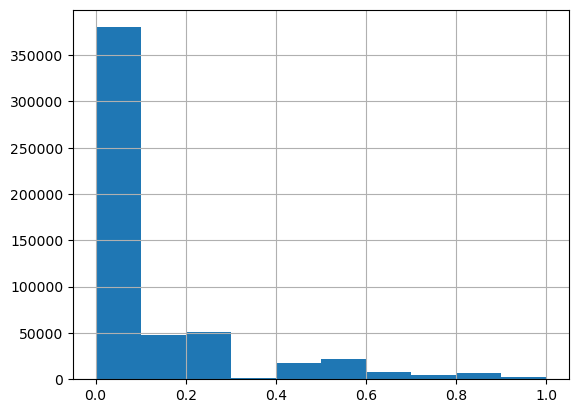

In [5]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [6]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [7]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [8]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [9]:
# librerías
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [14]:
# guardar mse para punto 5
lista_mse=[]
# crear un objeto CountVectorizer para preprocesar los datos train y test
vect_A = CountVectorizer()
X_tok_train = vect_A.fit_transform(X_train)
X_tok_test = vect_A.transform(X_test)

# se emplea stochastic gradient descent (SGD) como modelo de regresión
sgd_model = SGDRegressor(loss='squared_epsilon_insensitive', random_state=42) 

sgd_model.fit(X_tok_train, y_train)

y_pred = sgd_model.predict(X_tok_test)

mse = mean_squared_error(y_test, y_pred)
lista_mse.append(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {mse**0.5}")

Mean Squared Error: 0.025570091473537566
Root Mean Squared Error: 0.15990650854026414


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [21]:
vect_A = CountVectorizer(ngram_range=(3, 3))

X_tok_train = vect_A.fit_transform(X_train)
X_tok_test = vect_A.transform(X_test)

sgd_model = SGDRegressor(loss='squared_epsilon_insensitive', random_state=42) 

sgd_model.fit(X_tok_train, y_train)

y_pred = sgd_model.predict(X_tok_test)

mse_trig = mean_squared_error(y_test, y_pred)
lista_mse.append(mse_trig)
print(f"Mean Squared Error: {mse_trig}")
print(f"Root Mean Squared Error: {mse_trig**0.5}")

Mean Squared Error: 473681013.6990885
Root Mean Squared Error: 21764.214061139184


Se observa una diferencia significativa en los resultados de los dos modelos en cuanto a la métrica mse. Esto tiene varias explicaciones:

1. Por una parte, puede que para el algoritmo sea más fácil identificar la toxicidad de un comentario dada una palabra específica, puede que el contexto que aporta utilizar trigramas no brinda la información necesaria para el modelo.
2. La generación de trigramas puede estar generando un problema de dimensionalidad con el set de datos, al generar mayor número de columnas en la matriz. Esto se puede notar en los tiempos de corrida de ambos modelos. Por esta misma razón se seleccionó SGD (Support Gradient Descent) en lugar de RandomForestRegressor. Este último tomaba un tiempo excesivo en completarse, debido a la alta dimensionalidad de los datos.

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

**TfidfVectorizer** es una función del paquete `sklearn.feature_extraction.text`, al igual que **CountVectorizer**. 

La técnica consiste en convertir una serie de registros de texto en bruto a formato TF-IDF, que significa "Term Frequency-Inverse Document Frequency". 
La parte TF (Term Frequency) refiere a la cuenta de las ocurrencias de palabras en el texto, que es lo que realiza **CountVectorizer**, al crear una matriz en la cual sus filas son las diferentes instancias de documentos de texto (noticias, publicaciones, etc.) y sus columnas son las palabras existentes en todos los documentos. Para una fila i y una columna j, la observación ij representa el número de veces que se presenta la palabra j dentro del documento i.

 **TfidfVectorizer** va un paso más allá, y realiza una ponderación del TF contra IDF (Inverse Document Frequency), el cual busca penalizar las palabras que son muy frecuentes dentro de todos los documentos, y resaltar aquellas palabras distintivas de un documento respecto a los demás. Esto permite restar importancia a palabras muy comúnes dentro del lenguaje, que posiblemente no sean esenciales al problema de información que se busca solucionar, tales como las preposiciones "el", "la", "los", etc. en el español. Para un caso de análisis de sentimientos como el actual, por ejemplo, donde se busca identificar comentarios tóxicos, estas palabras son de poca utilidad para diferenciar la probabilidad de toxicidad a través de diferentes documentos. En cambio, palabras infrecuentes dentro de un documento, pero frecuentes en general, tales como "odio", "amo", son de mayor utilidad para solucionar el problema, y son priorizadas por el algoritmo TFIDF.

 Ventajas TFIDF: 
* Es un algoritmo más completo para la tokenización de palabras presentes en una colección de documentos, al dar una mayor importancia a palabras distintivas dentro de un documento, sobre palabras comúnes. Esto puede traducirse en un rendimiento mejorado de modelos de machine learning.

Desventajas TFIDF:
* Puede en ciertos casos ignorar palabras genéricas, pero importantes para la clasificación de documentos de texto en un contexto dado.
* Al ser un algoritmo más complejo, conlleva una mayor carga computacional que el CountVectorizer.

Fuentes empleadas:
[1] Scikit Learn, "TfidfVectorizer". Disponible en https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
[2] Scikit Learn, "CountVectorizer". Disponible en https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
[3] Wikipedia, "TF-IDF". Disponible en https://en.wikipedia.org/wiki/Tf%E2%80%93idf.




## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [13]:
# librerías
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [16]:
# crear un objeto TFIDF para preprocesar los datos train y test
vect_A = TfidfVectorizer()
X_tok_train = vect_A.fit_transform(X_train)
X_tok_test = vect_A.transform(X_test)

# se emplea stochastic gradient descent (SGD) como modelo de regresión
sgd_model = SGDRegressor(loss='squared_epsilon_insensitive', random_state=42) 

sgd_model.fit(X_tok_train, y_train)

y_pred = sgd_model.predict(X_tok_test)

mse = mean_squared_error(y_test, y_pred)
lista_mse.append(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {mse**0.5}")

Mean Squared Error: 0.03295350512238512
Root Mean Squared Error: 0.18153100319886165


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

In [17]:
# librerías
import matplotlib.pyplot as plt

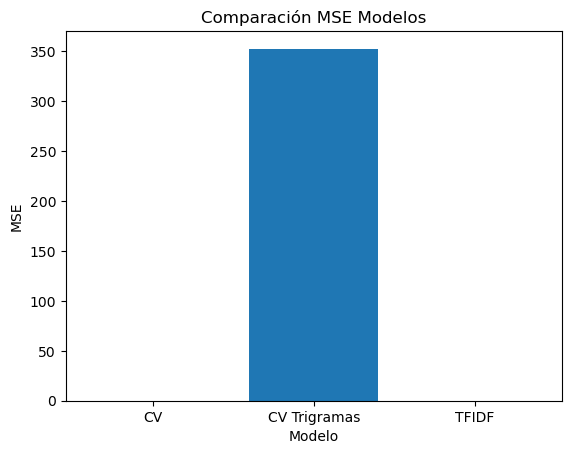

In [18]:
modelos=["CV", "CV Trigramas", "TFIDF"]

plt.bar(modelos, lista_mse)
plt.xlabel("Modelo")
plt.ylabel("MSE")
plt.title("Comparación MSE Modelos")
plt.show()


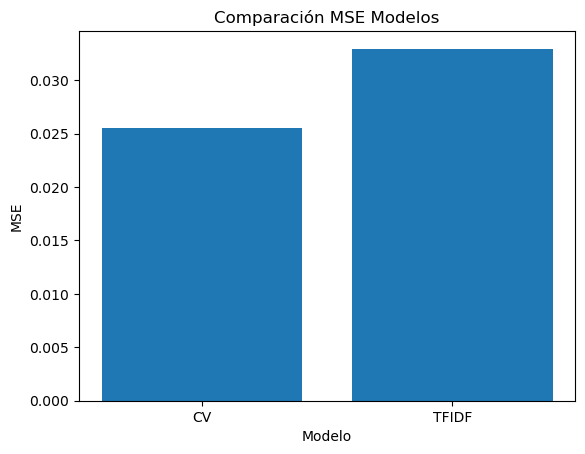

In [20]:
# mostrar CV contra TFIDF
modelos=["CV", "TFIDF"]
lista_2=[]
lista_2.append(lista_mse[0])
lista_2.append(lista_mse[2])
plt.bar(modelos, lista_2)
plt.xlabel("Modelo")
plt.ylabel("MSE")
plt.title("Comparación MSE Modelos")
plt.show()

Se observan las siguientes conclusiones sobre el ejercicio:
* Los resultados de MSE del punto 2 son atípicamente altos, especialmente considerando que los valores de la regresión son entre 0 y 1, lo cual probablemente sea un problema en el procesamiento de los datos y el empleo de la dimensionalidad de los trigramas, en combinación con el regresor SGD.
* Entre el CountVectorizer y el TFIDFVectorizer, para esta aplicación particular se observa un rendimiento mejor del primero, lo cual, según la explicación del tercer punto, es a primera vista contraintuitivo. Adentrando un poco en el conjunto de datos, las publicaciones tienden a ser un tanto cortas, es decir de unas líneas solamente. A continuación, se muestran unos ejemplos:



In [27]:
for i in range (0, 3):
    print(df["comment_text"][i])
    print("Numero de caracteres: ",len(df["comment_text"][i]))

What are you talking about? What group do Peter, Christy, and Dominique belong to? I'm not aware of any. Why are you still hiding behind a pseudonym?
Numero de caracteres:  149
NO!, Let him, we need a Conservative government.
Numero de caracteres:  48
Perhaps he took the "power out of the Cardinal's hands" to avoid any semblance of undue influence over the investigation?

Why is it the immediate reaction of posters here to jump to rash judgment without all the facts?  All the time - no matter what the accusation.  Even more if it is an opportunity to slam the Cardinal.
Numero de caracteres:  323


In [31]:
total=0
for i in range(0, df["comment_text"].shape[0]):
    total+=len(df["comment_text"][i])
prom=total/df["comment_text"].shape[0]
print("Promedio de caracteres publicación: ", prom)

Promedio de caracteres publicación:  297.3910154359863


Estas publicaciones corresponden a comentarios cortos, de aproximadamente un párrafo (300 a 600 caracteres), por lo cual probablemente no tienen la longitud suficiente en la cual el TFIDF logra una mejora en los modelos al restar la importancia de preposiciones y palabras genéricas. Se observa que, para longitudes cortas de documentos de texto, tales como la presente, el TFIDF tiene un rendimiento inferior al CountVectorizer.